In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
engine.execute(f'SELECT * FROM measurement WHERE measurement.date BETWEEN "2011-07-01" AND "2011-07-12" LIMIT 5').fetchall()

[(497, 'USC00519397', '2011-07-01', 0.05, 77.0),
 (498, 'USC00519397', '2011-07-02', 0.02, 78.0),
 (499, 'USC00519397', '2011-07-03', 0.0, 78.0),
 (500, 'USC00519397', '2011-07-04', 0.0, 78.0),
 (501, 'USC00519397', '2011-07-05', 0.01, 78.0)]

In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [15]:
station_pd = pd.DataFrame(engine.execute('SELECT * FROM station').fetchall())
station_pd = station_pd.rename(columns = {0:"id",1:"station",2:"name",3:"latitude",4:"longitude",5:"elevation"})
station_pd.set_index("id")
station_dict = dict(zip(station_pd.id,station_pd.station))
station_dict


{1: 'USC00519397',
 2: 'USC00513117',
 3: 'USC00514830',
 4: 'USC00517948',
 5: 'USC00518838',
 6: 'USC00519523',
 7: 'USC00519281',
 8: 'USC00511918',
 9: 'USC00516128'}

# Exploratory Climate Analysis

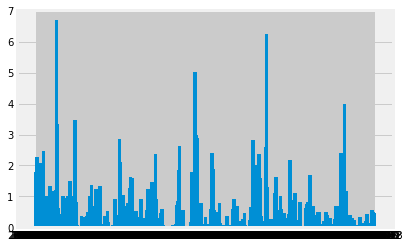

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
percep = pd.DataFrame(engine.execute(f'SELECT * FROM measurement ORDER BY measurement.date DESC').fetchall())
percep.rename(columns={0:"id",1:"station",2:"date",3:"prcp",4:"tobs"},inplace = True)
percep = percep.set_index("id")
max_date = percep.date.max()
min_date = "2016-08-23"
# Calculate the date 1 year ago from the last data point in the database
prev_year = percep[percep["date"]>=min_date]
prev_year = prev_year.sort_values("date")
prcp = prev_year["prcp"]
plt.bar(prev_year.date,prcp,width=4)
plt.show()
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# prev_year = prev_year[prev_year["prcp"]!=0]
# prev_year = prev_year.dropna()
# prev_year
# Perform a query to retrieve the data and precipitation scores
# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
prev_year_dict = prev_year[["date","prcp"]]
prev_year_dict.set_index("date")
date = prev_year_dict["date"]
prcp = prev_year_dict["prcp"]
prcp_dict = dict(zip(date,prcp))
prcp_dict
prev_year_dict_tobs = prev_year[["date","tobs"]]
prev_year_dict_tobs.set_index("date")
date = prev_year_dict_tobs["date"]
tobs = prev_year_dict_tobs["tobs"]
tobs_dict = dict(zip(date,tobs))
tobs_dict

# res = dict(zip(test_keys, test_values))

{'2016-08-23': 80.0,
 '2016-08-24': 79.0,
 '2016-08-25': 81.0,
 '2016-08-26': 80.0,
 '2016-08-27': 77.0,
 '2016-08-28': 78.0,
 '2016-08-29': 80.0,
 '2016-08-30': 79.0,
 '2016-08-31': 79.0,
 '2016-09-01': 82.0,
 '2016-09-02': 80.0,
 '2016-09-03': 78.0,
 '2016-09-04': 75.0,
 '2016-09-05': 79.0,
 '2016-09-06': 78.0,
 '2016-09-07': 76.0,
 '2016-09-08': 80.0,
 '2016-09-09': 75.0,
 '2016-09-10': 75.0,
 '2016-09-11': 76.0,
 '2016-09-12': 76.0,
 '2016-09-13': 76.0,
 '2016-09-14': 73.0,
 '2016-09-15': 79.0,
 '2016-09-16': 79.0,
 '2016-09-17': 76.0,
 '2016-09-18': 81.0,
 '2016-09-19': 79.0,
 '2016-09-20': 73.0,
 '2016-09-21': 78.0,
 '2016-09-22': 76.0,
 '2016-09-23': 80.0,
 '2016-09-24': 81.0,
 '2016-09-25': 76.0,
 '2016-09-26': 80.0,
 '2016-09-27': 79.0,
 '2016-09-28': 78.0,
 '2016-09-29': 80.0,
 '2016-09-30': 78.0,
 '2016-10-01': 80.0,
 '2016-10-02': 80.0,
 '2016-10-03': 79.0,
 '2016-10-04': 79.0,
 '2016-10-05': 79.0,
 '2016-10-06': 80.0,
 '2016-10-07': 78.0,
 '2016-10-08': 74.0,
 '2016-10-09'

![precipitation](Images/precipitation.png)

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prev_year_desc = prev_year.describe()
prev_year_desc = pd.DataFrame(prev_year_desc["prcp"])
prev_year_desc.rename(columns={"prcp":"precipitation"},inplace = True)
prev_year_desc

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [19]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT count(*) FROM station').fetchall()


[(9,)]

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station,func.count(Measurement.station)]
active = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
specific_station = session.query(*sel).filter(Measurement.station == 'USC00519281').all()
specific_station

[(54.0, 85.0, 71.66378066378067)]

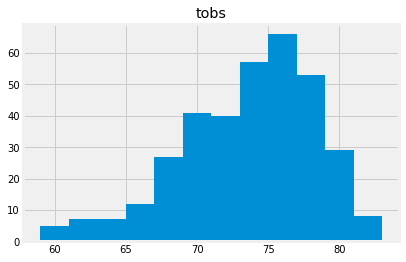

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
# and plot the results as a histogram

prev_year_filter = prev_year[prev_year["station"]=='USC00519281']
prev_year_filter = prev_year_filter[prev_year_filter["tobs"]!=0]
prev_year_filter = prev_year_filter.dropna()
prev_year_filter = prev_year_filter[["station","tobs"]]
prev_year_filter.hist(bins = 12)
plt.show()



![precipitation](Images/station-histogram.png)

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-02-28'))

[(66.0, 70.375, 73.0)]


In [58]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for each date in that range of dates
# use group by to allow you to view all dates

def calc_temps_by_date(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()

# function usage example
start_date = "2011-07-01"
end_date = '2011-07-12'
calc_temps_by_date(start_date, end_date)

#add dates into dictionary and then create a list of the dictionaries to jsonify
date_dict_list = []
date_dict = {}

row = 0
for x in range(0,len(calc_temps_by_date(start_date, end_date))):
    date_dict["Date"] = calc_temps_by_date(start_date, end_date)[row][0]
    date_dict["TMIN"] = calc_temps_by_date(start_date, end_date)[row][1]
    date_dict["TAVE"] = round(calc_temps_by_date(start_date, end_date)[row][2],2)
    date_dict["TMAX"] = calc_temps_by_date(start_date, end_date)[row][3]
    #append the dictionary created above to a list
    date_dict_list.append(dict(date_dict))
    row = row+1
    
date_dict_list
    

[{'Date': '2011-07-01', 'TMIN': 68.0, 'TAVE': 73.88, 'TMAX': 81.0},
 {'Date': '2011-07-02', 'TMIN': 73.0, 'TAVE': 76.0, 'TMAX': 79.0},
 {'Date': '2011-07-03', 'TMIN': 71.0, 'TAVE': 75.86, 'TMAX': 78.0},
 {'Date': '2011-07-04', 'TMIN': 70.0, 'TAVE': 75.29, 'TMAX': 78.0},
 {'Date': '2011-07-05', 'TMIN': 70.0, 'TAVE': 74.0, 'TMAX': 78.0},
 {'Date': '2011-07-06', 'TMIN': 69.0, 'TAVE': 73.67, 'TMAX': 79.0},
 {'Date': '2011-07-07', 'TMIN': 71.0, 'TAVE': 73.25, 'TMAX': 76.0},
 {'Date': '2011-07-08', 'TMIN': 71.0, 'TAVE': 74.75, 'TMAX': 77.0},
 {'Date': '2011-07-09', 'TMIN': 74.0, 'TAVE': 76.67, 'TMAX': 79.0},
 {'Date': '2011-07-10', 'TMIN': 71.0, 'TAVE': 76.14, 'TMAX': 79.0},
 {'Date': '2011-07-11', 'TMIN': 70.0, 'TAVE': 73.57, 'TMAX': 78.0},
 {'Date': '2011-07-12', 'TMIN': 67.0, 'TAVE': 73.71, 'TMAX': 77.0}]

In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps("2011-07-01", "2011-07-12"))

[(67.0, 74.64367816091954, 81.0)]


In [26]:
start_date = "2011-07-01"
end_date = "2011-07-12"
box = calc_temps(start_date, end_date)
date_list = []
for date in range(start_date,end_date):
    date_list.append(date)
    

TAVE = round(box[0][1],2)
TMAX = round(box[0][2],2)
TMIN = round(box[0][0],2)

date = []
TAVE_list = []
TMAX_list = []
TMIN_list = []
for date in box:
#     date.append(Measurement.date)
    TAVE_list.append(TAVE)
    TMAX_list.append(TMAX)
    TMIN_list.append(TMIN)

TAVE_list
    




TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
box = calc_temps("2011-07-01", "2011-07-12")
TAVE = round(box[0][1],2)
TMAX = round(box[0][2],2)
TMIN = round(box[0][0],2)
yerr = [TMIN-TMAX]
# yerr
TAVE_df = pd.DataFrame([TAVE])
TAVE_df = TAVE_df.rename(columns={0:"Temp (F)"})
TAVE_df.plot(kind="bar",yerr = yerr)
plt.title("Trip AVG Temp")
plt.ylabel("Temp (F)")
plt.show()
# TAVE.dtypes\

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, Measurement.date, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp]
same_station = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date<="2011-07-12").\
    filter(Measurement.date>="2011-07-01").all()
for record in same_station:
    (Measurement.station, Measurement.date, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp) = record
    print(record)

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
